<a href="https://colab.research.google.com/github/Manojpatil123/Machine-learning-Assignments/blob/main/Assignment_Solution_Principal_Component_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b> The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per \$10,000
* PTRATIO - pupil-teacher ratio by town
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT - % lower status of the population
* MEDV - Median value of owner-occupied homes in $1000's

## <b>MEDV is the dependent variable.

## In the linear regression assignment, you were not able to take care of the multicollinearity. Use principal component analysis to come up with linearly uncorrelated variables and run linear regression with regularization with these new features. You can experiment around with different degrees of variance you want to retain in the data.</b>

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Ridge


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset=pd.read_csv('/content/drive/MyDrive/AlmaBetter/Module 3/Week 4/Day 3/Housing.csv')

In [ ]:
dataset

,0.00632 18.00 2.310 0 0.5380 6.5750 65.20 4.0900 1 296.0 15.30 396.90 4.98 24.00
0,0.02731 0.00 7.070 0 0.4690 6.4210 78...
1,0.02729 0.00 7.070 0 0.4690 7.1850 61...
2,0.03237 0.00 2.180 0 0.4580 6.9980 45...
3,0.06905 0.00 2.180 0 0.4580 7.1470 54...
4,0.02985 0.00 2.180 0 0.4580 6.4300 58...
...,...
500,0.06263 0.00 11.930 0 0.5730 6.5930 69...
501,0.04527 0.00 11.930 0 0.5730 6.1200 76...
502,0.06076 0.00 11.930 0 0.5730 6.9760 91...
503,0.10959 0.00 11.930 0 0.5730 6.7940 89...


In [ ]:
dataset_df=dataset[' 0.00632  18.00   2.310  0  0.5380  6.5750  65.20  4.0900   1  296.0  15.30 396.90   4.98  24.00'].str.split(" +",expand=True)
dataset_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,,0.02731,0.00,7.070,0,0.4690,6.4210,78.90,4.9671,2,242.0,17.80,396.90,9.14,21.60
1,,0.02729,0.00,7.070,0,0.4690,7.1850,61.10,4.9671,2,242.0,17.80,392.83,4.03,34.70
2,,0.03237,0.00,2.180,0,0.4580,6.9980,45.80,6.0622,3,222.0,18.70,394.63,2.94,33.40
3,,0.06905,0.00,2.180,0,0.4580,7.1470,54.20,6.0622,3,222.0,18.70,396.90,5.33,36.20
4,,0.02985,0.00,2.180,0,0.4580,6.4300,58.70,6.0622,3,222.0,18.70,394.12,5.21,28.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,,0.06263,0.00,11.930,0,0.5730,6.5930,69.10,2.4786,1,273.0,21.00,391.99,9.67,22.40
501,,0.04527,0.00,11.930,0,0.5730,6.1200,76.70,2.2875,1,273.0,21.00,396.90,9.08,20.60
502,,0.06076,0.00,11.930,0,0.5730,6.9760,91.00,2.1675,1,273.0,21.00,396.90,5.64,23.90
503,,0.10959,0.00,11.930,0,0.5730,6.7940,89.30,2.3889,1,273.0,21.00,393.45,6.48,22.00


In [ ]:
dataset_df = dataset_df.drop([0],axis=1)

In [ ]:
dataset_df

,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.02731,0.00,7.070,0,0.4690,6.4210,78.90,4.9671,2,242.0,17.80,396.90,9.14,21.60
1,0.02729,0.00,7.070,0,0.4690,7.1850,61.10,4.9671,2,242.0,17.80,392.83,4.03,34.70
2,0.03237,0.00,2.180,0,0.4580,6.9980,45.80,6.0622,3,222.0,18.70,394.63,2.94,33.40
3,0.06905,0.00,2.180,0,0.4580,7.1470,54.20,6.0622,3,222.0,18.70,396.90,5.33,36.20
4,0.02985,0.00,2.180,0,0.4580,6.4300,58.70,6.0622,3,222.0,18.70,394.12,5.21,28.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,0.06263,0.00,11.930,0,0.5730,6.5930,69.10,2.4786,1,273.0,21.00,391.99,9.67,22.40
501,0.04527,0.00,11.930,0,0.5730,6.1200,76.70,2.2875,1,273.0,21.00,396.90,9.08,20.60
502,0.06076,0.00,11.930,0,0.5730,6.9760,91.00,2.1675,1,273.0,21.00,396.90,5.64,23.90
503,0.10959,0.00,11.930,0,0.5730,6.7940,89.30,2.3889,1,273.0,21.00,393.45,6.48,22.00


In [ ]:
for column in dataset_df:
  dataset_df[column]=pd.to_numeric(dataset_df[column],errors='coerce')

In [ ]:


dataset_df.columns=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']

new_row={'CRIM':0.00632,'ZN':18.00,'INDUS':2.310,'CHAS':0,'NOX':0.5380,'RM':0.5380,'AGE':65.20 ,'DIS':4.0900,'RAD':4.0900,'TAX':296.0,'PTRATIO':15.30,'B':396.90,'LSTAT': 4.98,'MEDV':24.00}

dataset_df = dataset_df.append(new_row, ignore_index=True)
dataset_df


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.00,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.00,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.00,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.00,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.00,222.0,18.7,394.12,5.21,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.00,273.0,21.0,396.90,9.08,20.6
502,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.00,273.0,21.0,396.90,5.64,23.9
503,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.00,273.0,21.0,393.45,6.48,22.0
504,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.00,273.0,21.0,396.90,7.88,11.9


In [ ]:
# dataset_df=datset_df1
dataset_df[dataset_df['MEDV'].isnull()]=21.95

In [ ]:
dataset_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.00,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.00,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.00,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.00,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.00,222.0,18.7,394.12,5.21,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.00,273.0,21.0,396.90,9.08,20.6
502,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.00,273.0,21.0,396.90,5.64,23.9
503,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.00,273.0,21.0,393.45,6.48,22.0
504,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.00,273.0,21.0,396.90,7.88,11.9


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


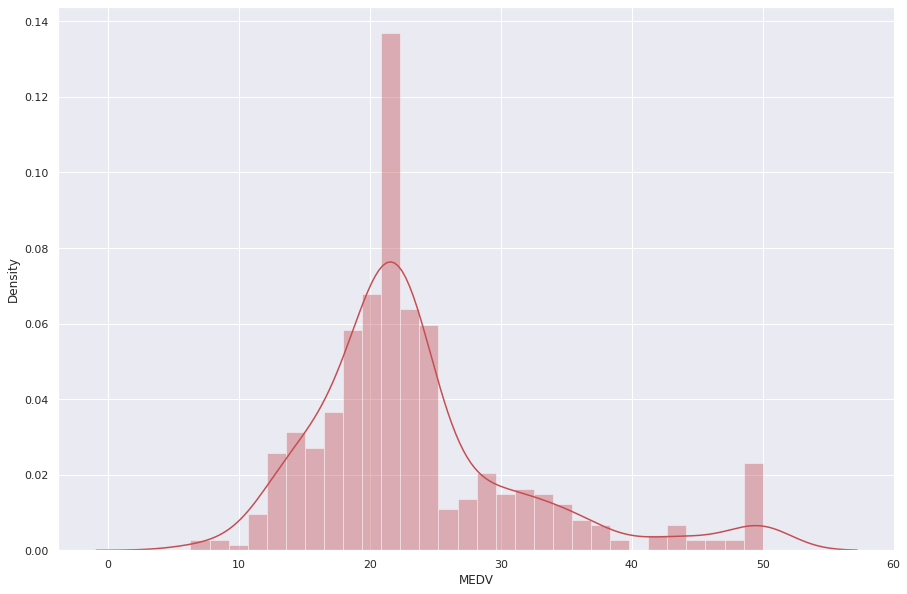

In [ ]:
plt.figure(figsize=(15,10))
sns.distplot(dataset_df['MEDV'],color='r')

In [ ]:
# X=dataset_df.iloc[:,:-1]
# Y=dataset_df.iloc[:,-1]

In [ ]:

#standardizing after splitting
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)
sc = StandardScaler()
dataset= sc.fit_transform(dataset_df)
dataset_df1=pd.DataFrame(dataset)
# X_test_std = sc.fit_transform(X_test)

In [ ]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
2,0.03237,0.00,2.18,0.00,0.458,6.998,45.80,6.0622,3.00,222.00,18.70,394.63,2.94
79,0.04113,25.00,4.86,0.00,0.426,6.727,33.50,5.4007,4.00,281.00,19.00,396.90,5.29
455,4.66883,0.00,18.10,0.00,0.713,5.976,87.90,2.5806,24.00,666.00,20.20,10.48,19.01
439,21.95000,21.95,21.95,21.95,21.950,21.950,21.95,21.9500,21.95,21.95,21.95,21.95,21.95
376,9.82349,0.00,18.10,0.00,0.671,6.794,98.80,1.3580,24.00,666.00,20.20,396.90,21.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,0.19133,22.00,5.86,0.00,0.431,5.605,70.20,7.9549,7.00,330.00,19.10,389.13,18.46
132,0.32982,0.00,21.89,0.00,0.624,5.822,95.40,2.4699,4.00,437.00,21.20,388.69,15.03
164,2.92400,0.00,19.58,0.00,0.605,6.101,93.00,2.2834,5.00,403.00,14.70,240.16,9.81
358,4.26131,0.00,18.10,0.00,0.770,6.112,81.30,2.5091,24.00,666.00,20.20,390.74,12.67


In [ ]:
# pca = PCA(n_components=elem)
# X_trainp=pca.fit_transform(X_train)
# print(X_trainp)
# X_test_p=pca.fit_transform(X_test)


PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)


PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
lst=[]
X=dataset_df1.iloc[:,:-1]
Y=dataset_df1.iloc[:,-1]
a=LinearRegression()
b=Lasso(alpha=0.1 , max_iter= 3000)
c=Ridge(alpha=0.1, fit_intercept=True)


for ELEM in [a,b,c]:
  df_simple_lin_reg=pd.DataFrame(columns=['MSE','RMSE','r2_score','MAE','variance'])
  for elem in [1,2,3,4,5,6,7,8,9,10,11,12,13]:
    
    pca = PCA(n_components=elem)
    X_trainp=pca.fit_transform(X)
    # print(X_trainp)
    # X_test_p=pca.fit_transform(X_test)
    X_train, X_test, y_train, y_test = train_test_split(X_trainp, Y, test_size=0.20,random_state=42)
    # Fitting Multiple Linear Regression to the Training set
    regressor = ELEM
    regressor.fit((X_train),(y_train))

    y_pred1 = regressor.predict(X_test)
    

    

    MSE  = mean_squared_error((y_test),(y_pred1))
    # print("MSE :" , MSE)

    RMSE = np.sqrt(MSE)
    # print("RMSE :" ,RMSE)

    r2 = r2_score((y_test),(y_pred1))
    # print("R2 :" ,r2)
    Adjusted_R2 = (1-(1-r2_score(y_test, y_pred1))*((len(X_test)-1)/(len(X_test)-len(X_test[0])-1)))
    
    MAE=mean_absolute_error(y_test, y_pred1)
    variance=pca.explained_variance_
    df_simple_lin_reg= pd.DataFrame(df_simple_lin_reg.append({'MSE':MSE,'RMSE':RMSE,'r2_score':r2,'Adjusted_R2':Adjusted_R2,'MAE':MAE,'variance':variance},ignore_index=True))
    df_simple_lin_reg.index = range(1,len(df_simple_lin_reg)+1)
  lst.append(df_simple_lin_reg)
  print(f'This the table for {ELEM} for different value of principal component')
  print(df_simple_lin_reg)

This the table for LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) for different value of principal component
         MSE  ...  Adjusted_R2
1   0.859392  ...    -0.083108
2   0.475690  ...     0.394423
3   0.441639  ...     0.432035
4   0.432268  ...     0.438356
5   0.402115  ...     0.472090
6   0.421099  ...     0.441348
7   0.357450  ...     0.520743
8   0.355866  ...     0.517737
9   0.347954  ...     0.523333
10  0.326629  ...     0.547630
11  0.302727  ...     0.576074
12  0.301034  ...     0.573709
13  0.272667  ...     0.609491

[13 rows x 6 columns]
This the table for Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=3000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False) for different value of principal component
         MSE  ...  Adjusted_R2
1   0.854997  ...    -0.077569
2   0.489174  ...     0.377257
3   0.489174  ...     0.370902
4   0.489174  ... 

# For simple regression

In [ ]:
lst[0]

,MSE,RMSE,r2_score,MAE,variance,Adjusted_R2
1,0.859392,0.927034,-0.072384,0.684015,[7.263102661732968],-0.083108
2,0.475690,0.689703,0.406415,0.474159,"[7.263102661732968, 2.9323800378287097]",0.394423
3,0.441639,0.664559,0.448905,0.449833,"[7.263102661732968, 2.932380037828715, 0.87919...",0.432035
4,0.432268,0.657471,0.460599,0.434251,"[7.2631026617329635, 2.9323800378287066, 0.879...",0.438356
5,0.402115,0.634126,0.498224,0.437477,"[7.263102661732968, 2.932380037828712, 0.87919...",0.472090
6,0.421099,0.648921,0.474536,0.439026,"[7.263102661732967, 2.9323800378287097, 0.8791...",0.441348
7,0.357450,0.597871,0.553959,0.401495,"[7.263102661732968, 2.932380037828713, 0.87919...",0.520743
8,0.355866,0.596545,0.555936,0.408156,"[7.263102661732968, 2.932380037828715, 0.87919...",0.517737
9,0.347954,0.589876,0.565809,0.406436,"[7.263102661732965, 2.932380037828716, 0.87919...",0.523333
10,0.326629,0.571515,0.592419,0.402214,"[7.263102661732967, 2.9323800378287097, 0.8791...",0.547630


# For lasso regression

In [ ]:
lst[1]

,MSE,RMSE,r2_score,MAE,variance,Adjusted_R2
1,0.854997,0.924661,-0.066900,0.669210,[7.263102661732965],-0.077569
2,0.489174,0.699410,0.389588,0.475815,"[7.26310266173297, 2.9323800378287066]",0.377257
3,0.489174,0.699410,0.389588,0.475815,"[7.263102661732965, 2.932380037828713, 0.87919...",0.370902
4,0.489174,0.699410,0.389588,0.475815,"[7.263102661732968, 2.9323800378287075, 0.8791...",0.364417
5,0.414401,0.643740,0.482893,0.433558,"[7.263102661732968, 2.932380037828714, 0.87919...",0.455960
6,0.414401,0.643740,0.482893,0.433558,"[7.2631026617329715, 2.9323800378287173, 0.879...",0.450234
7,0.402544,0.634463,0.497690,0.426266,"[7.263102661732965, 2.9323800378287106, 0.8791...",0.460284
8,0.402544,0.634463,0.497690,0.426266,"[7.263102661732967, 2.9323800378287106, 0.8791...",0.454480
9,0.402544,0.634463,0.497690,0.426266,"[7.263102661732967, 2.932380037828714, 0.87919...",0.448551
10,0.402544,0.634463,0.497690,0.426266,"[7.263102661732965, 2.932380037828712, 0.87919...",0.442491


# For ridge regression

In [ ]:
lst[1]

,MSE,RMSE,r2_score,MAE,variance,Adjusted_R2
1,0.854997,0.924661,-0.066900,0.669210,[7.263102661732965],-0.077569
2,0.489174,0.699410,0.389588,0.475815,"[7.26310266173297, 2.9323800378287066]",0.377257
3,0.489174,0.699410,0.389588,0.475815,"[7.263102661732965, 2.932380037828713, 0.87919...",0.370902
4,0.489174,0.699410,0.389588,0.475815,"[7.263102661732968, 2.9323800378287075, 0.8791...",0.364417
5,0.414401,0.643740,0.482893,0.433558,"[7.263102661732968, 2.932380037828714, 0.87919...",0.455960
6,0.414401,0.643740,0.482893,0.433558,"[7.2631026617329715, 2.9323800378287173, 0.879...",0.450234
7,0.402544,0.634463,0.497690,0.426266,"[7.263102661732965, 2.9323800378287106, 0.8791...",0.460284
8,0.402544,0.634463,0.497690,0.426266,"[7.263102661732967, 2.9323800378287106, 0.8791...",0.454480
9,0.402544,0.634463,0.497690,0.426266,"[7.263102661732967, 2.932380037828714, 0.87919...",0.448551
10,0.402544,0.634463,0.497690,0.426266,"[7.263102661732965, 2.932380037828712, 0.87919...",0.442491
